In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [1]:

!cd yolov5 & pip install -r requirements.txt


In [2]:

import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\PRADEEP/.cache\torch\hub\master.zip
YOLOv5  2021-7-22 torch 1.8.1 CPU



Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

In [5]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [10]:
results = model('image.jpg')
results.print()

image 1/1: 533x800 37 cars, 4 trucks
Speed: 8.0ms pre-process, 296.0ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


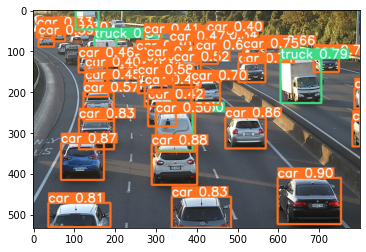

In [11]:

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
cap = cv2.VideoCapture(r'D:\bravedownloads\New folder\DRONE-SURVEILLANCE-CONTEST-VIDEO.mp4')

In [20]:
while True:
    success , frame = cap.read()
    
    results = model(frame)
    cv2.imshow('output',np.squeeze(results.render()))
   
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        
        break
cap.release()
cv2.destroyAllWindows()
    